In [ ]:
#install required packages
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *

!pip install category_encoders
import category_encoders as ce

# All matplot packages
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MultipleLocator
from tqdm import tqdm # progress slider for "for" loops
from tabulate import tabulate

#All sklearn packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import cosine_similarity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.7 MB/s eta 0:00:00


## Load Data

In [ ]:
!gdown 1HsL3AR7-WBwqluTN_Kp61g7ucpsL-FXA

Downloading...
From: https://drive.google.com/uc?id=1HsL3AR7-WBwqluTN_Kp61g7ucpsL-FXA
To: /content/dataset.csv
100% 94.9k/94.9k [00:00<00:00, 63.4MB/s]


In [ ]:
#load the data
df = pd.read_csv("dataset.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.info()
# df.drop('team', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


# Visualizations

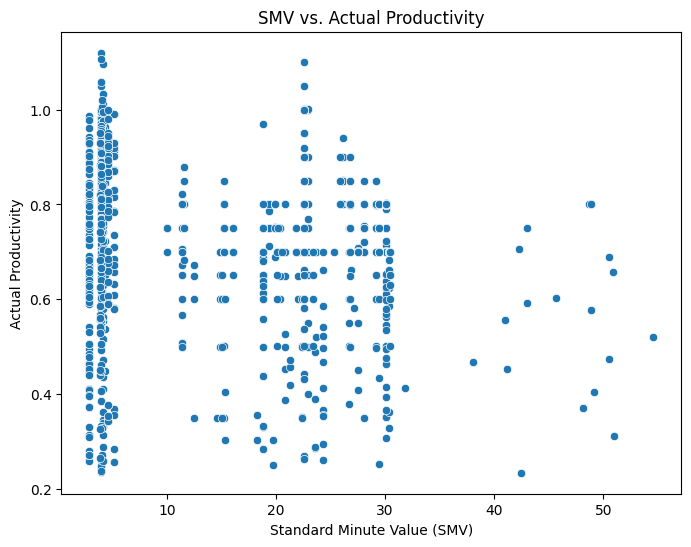

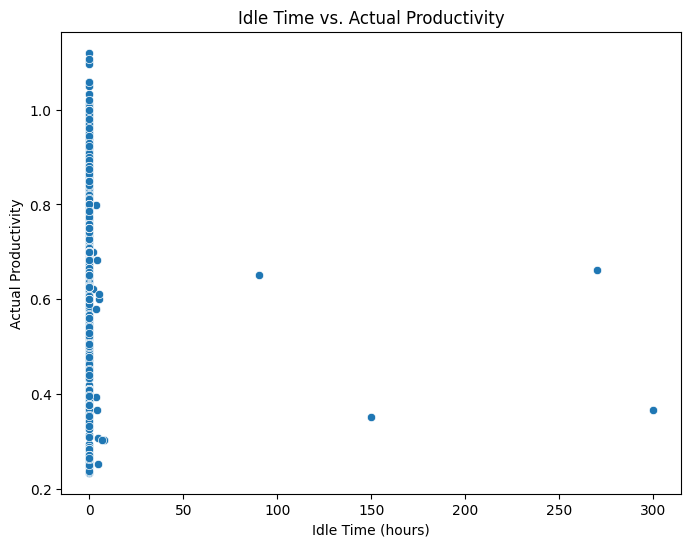

In [ ]:
#Scatterplot: SMV vs Actual Productivity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='smv', y='actual_productivity', data=df)
plt.title('SMV vs. Actual Productivity')
plt.xlabel('Standard Minute Value (SMV)')
plt.ylabel('Actual Productivity')
plt.show()

#Scatterplot: Idle Time vs Actual Productivity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='idle_time', y='actual_productivity', data=df)
plt.title('Idle Time vs. Actual Productivity')
plt.xlabel('Idle Time (hours)')
plt.ylabel('Actual Productivity')
plt.show()

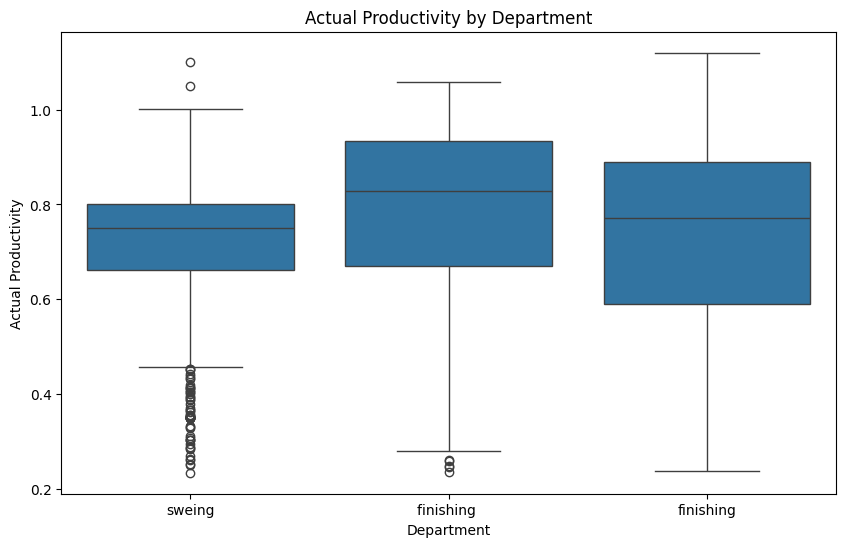

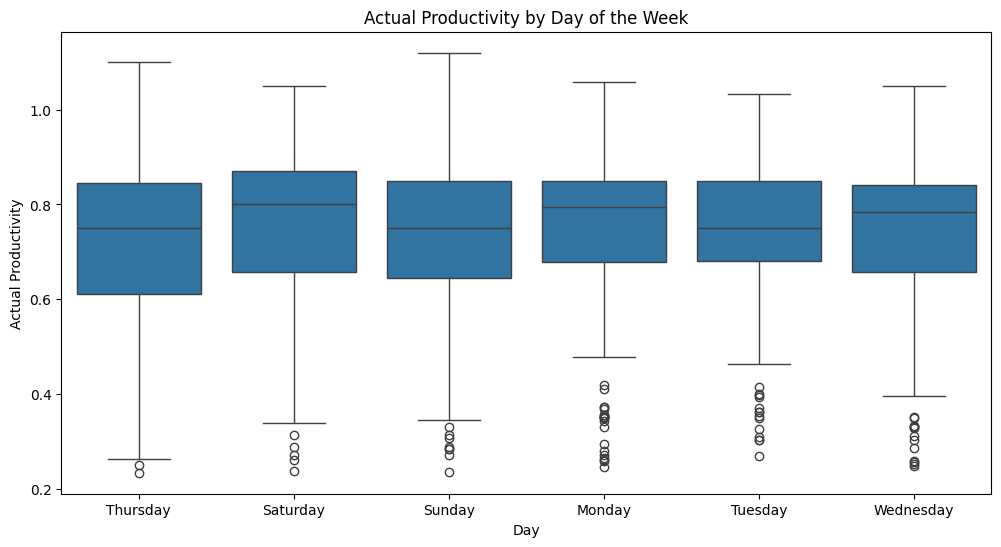

In [ ]:
#Boxplot: Actual Productivity by Department
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='actual_productivity', data=df)
plt.title('Actual Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.show()

#Boxplot: Actual Productivity by Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='actual_productivity', data=df)
plt.title('Actual Productivity by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Actual Productivity')
plt.show()

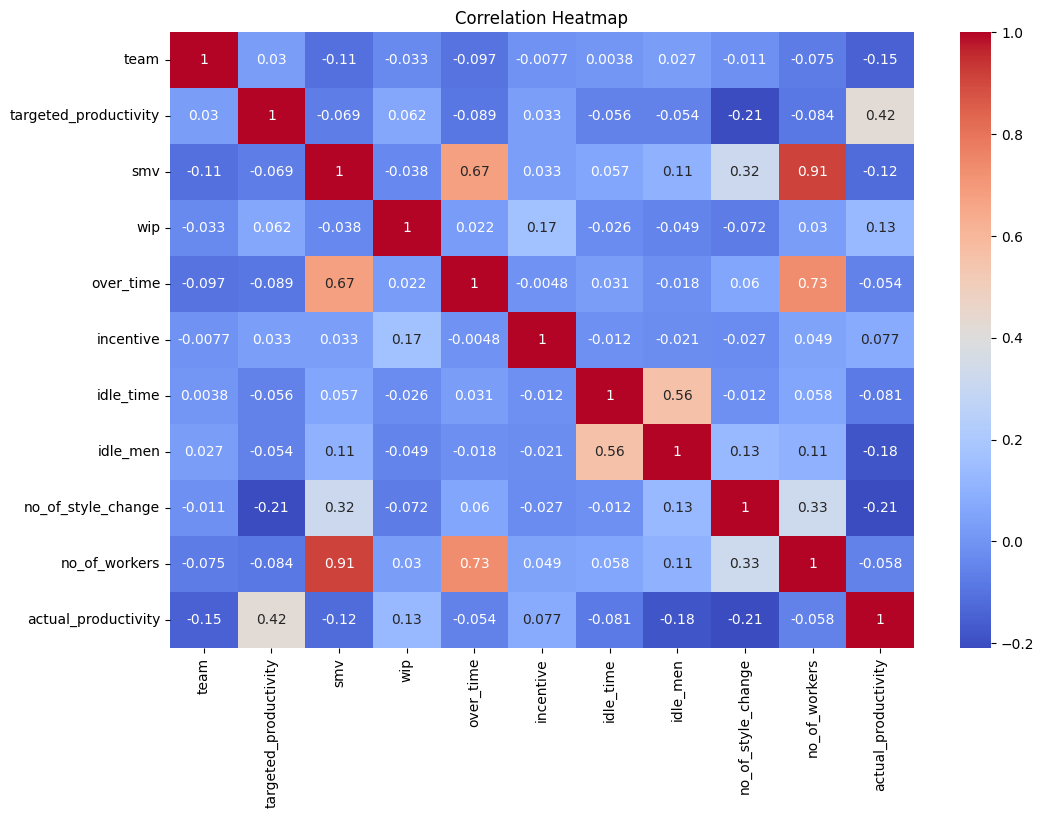

In [ ]:
# Correlation Heatmap (only for numerical variables)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

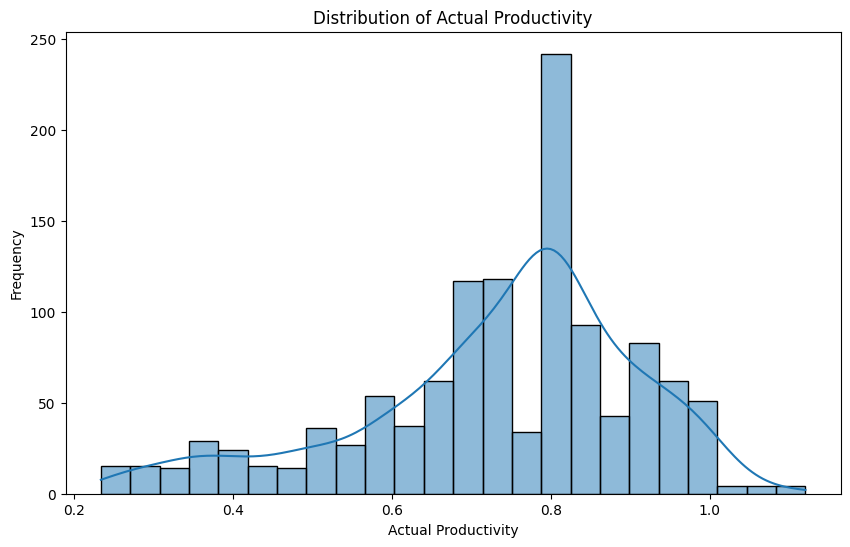

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_productivity'], kde=True)
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()


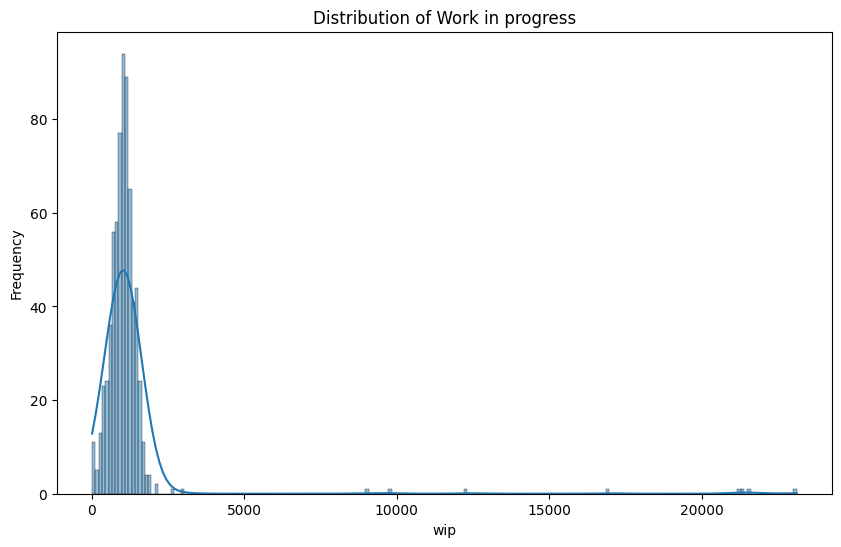

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['wip'], kde=True)
plt.title('Distribution of Work in progress')
plt.xlabel('wip')
plt.ylabel('Frequency')
plt.show()

# Initial Data Cleaning

In [ ]:
#checking the unique values in department
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [ ]:
df = df.drop('date', axis=1)
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )
df['wip'] = df['wip'].fillna(value=0.0)

In [ ]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
# df = pd.get_dummies(df, columns=['quarter','department', 'day'])
df = pd.get_dummies(df, columns=['quarter','department', 'day', 'team'])
df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,...,False,False,False,False,False,True,False,False,False,False
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,...,False,False,False,False,False,False,False,False,False,False
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,...,False,False,False,False,False,False,False,False,True,False
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,...,False,False,False,False,False,False,False,False,False,True
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   smv                    1197 non-null   float64
 2   wip                    1197 non-null   float64
 3   over_time              1197 non-null   int64  
 4   incentive              1197 non-null   int64  
 5   idle_time              1197 non-null   float64
 6   idle_men               1197 non-null   int64  
 7   no_of_style_change     1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  quarter_Quarter1       1197 non-null   bool   
 11  quarter_Quarter2       1197 non-null   bool   
 12  quarter_Quarter3       1197 non-null   bool   
 13  quarter_Quarter4       1197 non-null   bool   
 14  quarter_Quarter5       1197 non-null   bool   
 15  depa

#Train Test Split and Scaling

In [ ]:
X = df.drop('actual_productivity', axis=1)  # Features
y = df['actual_productivity']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scale after train test split to prevent data spilling, right now using RobustScaler to account for outliers, but can change later
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [ ]:
linreg = LinearRegression()
scores = cross_val_score(linreg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
print("Cross-validation MSE scores: ", mse_scores)
print("Mean cross-validation MSE: ", mse_scores.mean())


Cross-validation MSE scores:  [0.04918183 0.02137768 0.02119782 0.02178912 0.01993765]
Mean cross-validation MSE:  0.02669682014114716


In [ ]:
r2_scores = cross_val_score(linreg, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores: ", r2_scores)
print("Mean cross-validation R-squared: ", r2_scores.mean())

Cross-validation R-squared scores:  [-0.43548183  0.16714313  0.38010631  0.27359681  0.36632286]
Mean cross-validation R-squared:  0.15033745507766744


In [ ]:
# Fit the model on the training data
linreg.fit(X_train_scaled, y_train)

#predict on train data
y_pred_train = linreg.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train set MSE: ", mse_train)

# Predict on the test data
y_pred = linreg.predict(X_test_scaled)

# Evaluate  model on the test data
mse_test = mean_squared_error(y_test, y_pred)
print("Test set MSE: ", mse_test)

Train set MSE:  0.020078308082920646
Test set MSE:  0.02256977445814691


# Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_mse_scores = -rf_scores  # Convert negative MSE to positive
print("Cross-validation MSE scores (Random Forest): ", rf_mse_scores)
print("Mean cross-validation MSE (Random Forest): ", rf_mse_scores.mean())


Cross-validation MSE scores (Random Forest):  [0.02350811 0.01364622 0.01541715 0.01526674 0.01432336]
Mean cross-validation MSE (Random Forest):  0.016432316696007056


In [ ]:
#Perform Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation MSE: ", -grid_search.best_score_)

#Evaluate the model on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Test set MSE (Random Forest): ", test_mse_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation MSE:  0.01607714657051077
Test set MSE (Random Forest):  0.012209283765224673


In [ ]:
train_mse_rf = mean_squared_error(y_train, best_rf.predict(X_train_scaled))
print("Train set MSE (Random Forest): ", train_mse_rf)

Train set MSE (Random Forest):  0.005136673292899487


Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')


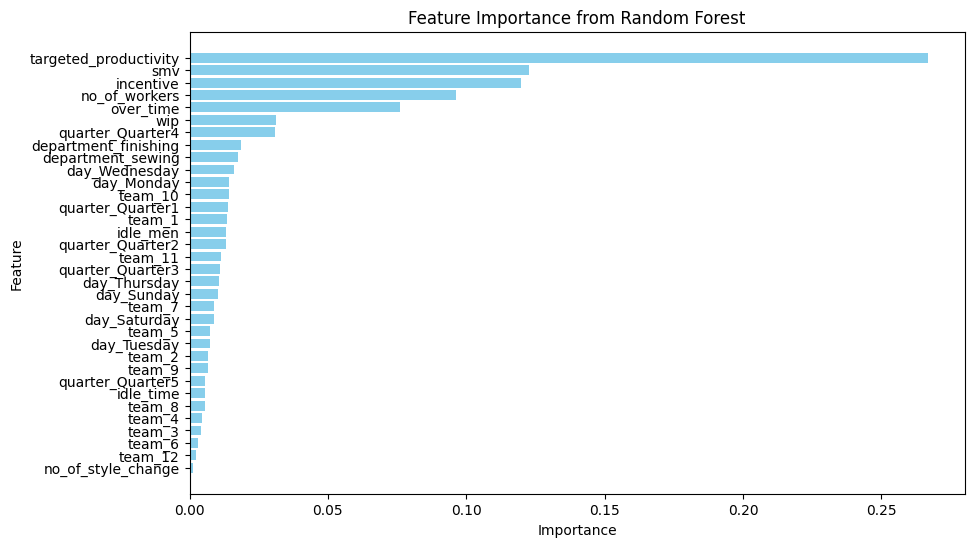

In [ ]:
importances = best_rf.feature_importances_
#Get feature names
features = X_train.columns
print(features)
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

#Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

#Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

#Gradient Boosting

In [ ]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)

# Train the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict on the training and test data
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)

# Calculate MSE for training and test sets
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)

# Print Train and Test MSE
print(f"Gradient Boosting - Train MSE: {mse_train_gb}")
print(f"Gradient Boosting - Test MSE: {mse_test_gb}")

Gradient Boosting - Train MSE: 0.009856622125132688
Gradient Boosting - Test MSE: 0.015016027406971609


                  Feature  Importance
0   targeted_productivity    0.275164
4               incentive    0.159858
1                     smv    0.138197
8           no_of_workers    0.135982
3               over_time    0.063967
2                     wip    0.036246
6                idle_men    0.031421
12       quarter_Quarter4    0.030440
14   department_finishing    0.029173
32                team_11    0.012207
22                 team_1    0.011887
15      department_sewing    0.009125
30                 team_9    0.007074
31                team_10    0.006948
13       quarter_Quarter5    0.005532
18             day_Sunday    0.005407
28                 team_7    0.005397
10       quarter_Quarter2    0.005167
9        quarter_Quarter1    0.004769
26                 team_5    0.004281
5               idle_time    0.003837
25                 team_4    0.003157
19           day_Thursday    0.003154
29                 team_8    0.002798
24                 team_3    0.002120
16          

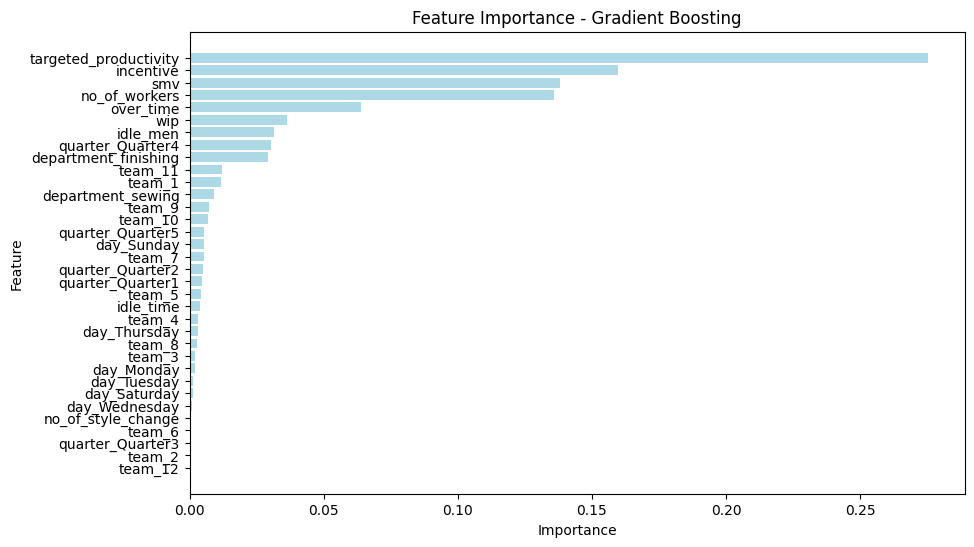

In [ ]:
# Feature importance visualization
feature_importances = gb_model.feature_importances_
feature_names = X.columns  # Assuming X is the original DataFrame of features

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# KNN

In [ ]:
#Fitting the KNN Model
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
#Predict on test set and calculate MSE and R2
y_pred_train = knn.predict(X_train_scaled)
y_pred = knn.predict(X_test_scaled)
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred))
print('Test R-squared:', r2_score(y_test, y_pred))

Train MSE: 0.013086673984686523
Test MSE: 0.017378992397839924
Test R-squared: 0.34548482031301975


# Ridge Regression

Best Lambda: 36.783797718286344 with Train MSE: 0.021047691528013075
Best Lambda: 36.783797718286344 with Test MSE: 0.021793558628062863
Best Lambda: 36.783797718286344 with Cross-validated MSE: 0.022553731260965642


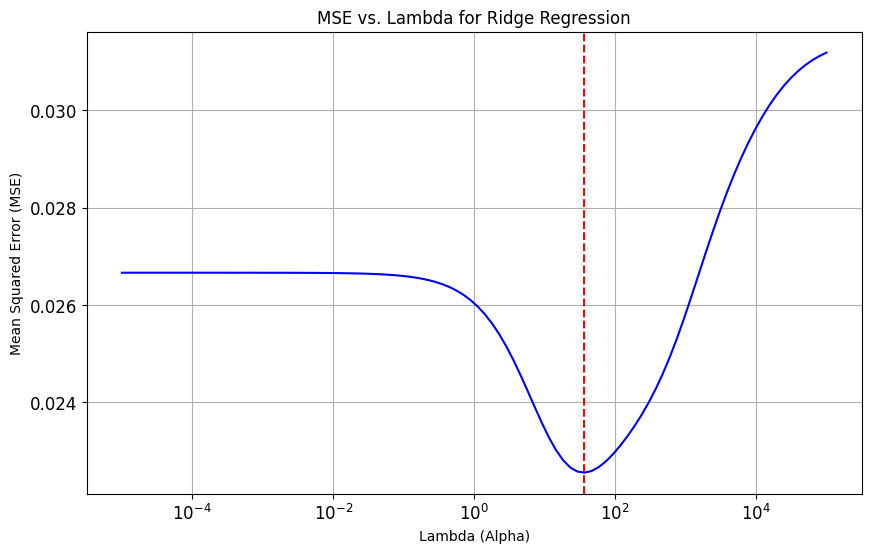

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge
num_lambdas = 100
lambdas = np.logspace(-5, 5, num_lambdas)

ridge_cv = RidgeCV(alphas=lambdas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

ridge_cv_mse_train = mean_squared_error(y_train, ridge_cv.predict(X_train_scaled))
print(f"Best Lambda: {ridge_cv.alpha_} with Train MSE: {ridge_cv_mse_train}")

ridgecv_mse = mean_squared_error(y_test, ridge_cv.predict(X_test_scaled))
print(f"Best Lambda: {ridge_cv.alpha_} with Test MSE: {ridgecv_mse}")

best_lambda = ridge_cv.alpha_

cv_mse_scores = []
# Calculate cross-validated MSE for each lambda
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    # Use cross_val_score with neg_mean_squared_error
    neg_mse = cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    # Convert negative MSE to positive and take the mean
    cv_mse_scores.append(-np.mean(neg_mse))

min_cv_mse = min(cv_mse_scores)
min_cv_mse_idx = cv_mse_scores.index(min_cv_mse)
print(f"Best Lambda: {lambdas[min_cv_mse_idx]} with Cross-validated MSE: {min_cv_mse}")

plt.figure(figsize=(10, 6))
plt.plot(lambdas, cv_mse_scores, color='b', linestyle='-')
plt.xscale('log')
plt.xlabel("Lambda (Alpha)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Lambda for Ridge Regression")
plt.grid(True)
plt.axvline(x=best_lambda, color='r', linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

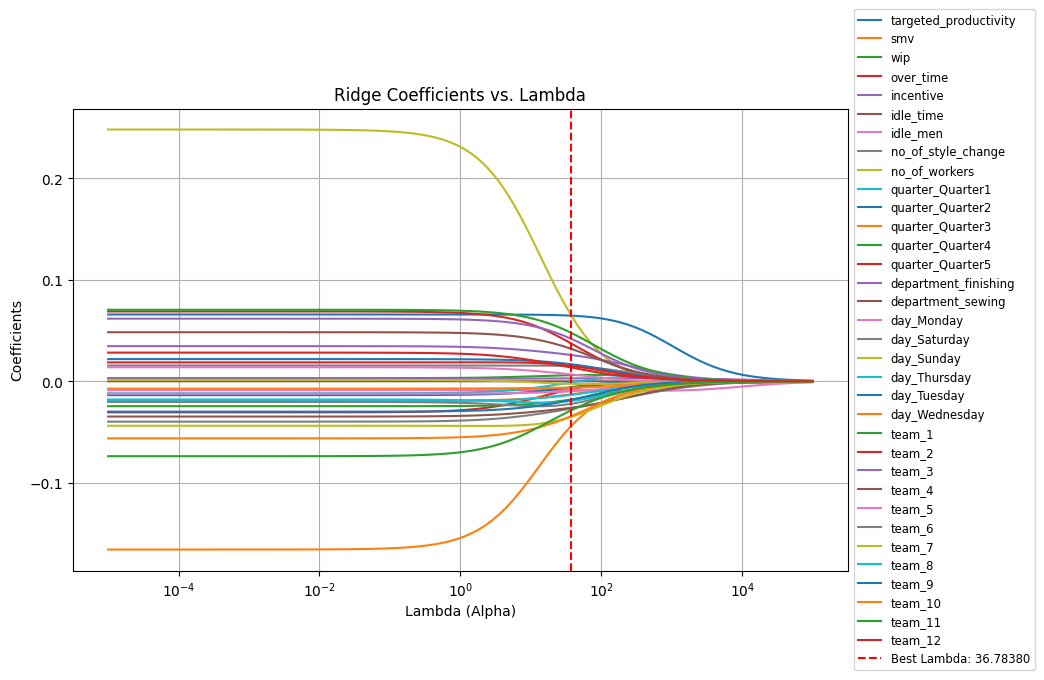

In [ ]:
feature_names = X_train.columns
coefs = []
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

# Transpose coefficients to have each row represent a feature
coefs = np.array(coefs).T

plt.figure(figsize=(10, 6))
for coef, name in zip(coefs, feature_names):
    plt.plot(lambdas, coef, label=name)

plt.xscale('log')
plt.xlabel("Lambda (Alpha)")
plt.ylabel("Coefficients")
plt.title("Ridge Coefficients vs. Lambda")
plt.grid(True)
plt.axvline(x=best_lambda, color='r', linestyle='--', label=f'Best Lambda: {best_lambda:.5f}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.show()

# Lasso Regression

Best Lambda: 0.00025950242113997375 with Test MSE: 0.022185465481624554
Best Lambda: 0.00025950242113997375 with Train MSE: 0.020106538656411776
Best Lambda: 0.0002915053062825176 with Cross-validated MSE: 0.021778358755324266


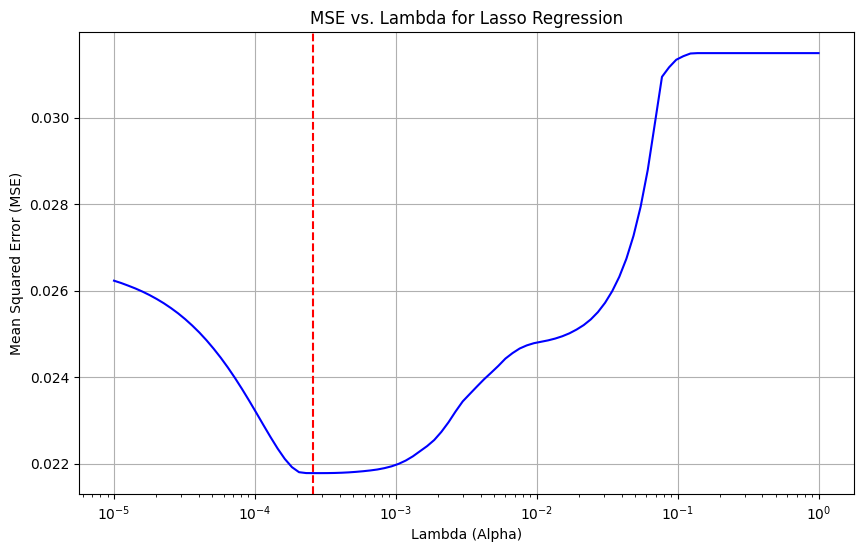

In [ ]:
from sklearn.linear_model import LassoCV, Lasso

lasso_cv = LassoCV(alphas=lambdas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

lassocv_mse = mean_squared_error(y_test, lasso_cv.predict(X_test_scaled))
print(f"Best Lambda: {lasso_cv.alpha_} with Test MSE: {lassocv_mse}")

lasso_cv_mse_train = mean_squared_error(y_train, lasso_cv.predict(X_train_scaled))
print(f"Best Lambda: {lasso_cv.alpha_} with Train MSE: {lasso_cv_mse_train}")

best_lambda = lasso_cv.alpha_
num_lambdas = 100
lambdas = np.logspace(-5, 0, num_lambdas)
mse_scores = []
coefficients = []

# Calculate cross-validated MSE for each lambda
for alpha in lambdas:
    lasso = Lasso(alpha=alpha)
    neg_mse = cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-np.mean(neg_mse))
    lasso.fit(X_train_scaled, y_train)
    coefficients.append(lasso.coef_)

min_cv_mse = min(mse_scores)
min_cv_mse_idx = mse_scores.index(min_cv_mse)
print(f"Best Lambda: {lambdas[min_cv_mse_idx]} with Cross-validated MSE: {min_cv_mse}")

# Plot MSE vs. lambda
plt.figure(figsize=(10, 6))
plt.plot(lambdas, mse_scores,color='b', linestyle='-')
plt.xscale('log')
plt.xlabel("Lambda (Alpha)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Lambda for Lasso Regression")
plt.grid(True)
plt.axvline(x=best_lambda, color='r', linestyle='--')
plt.show()

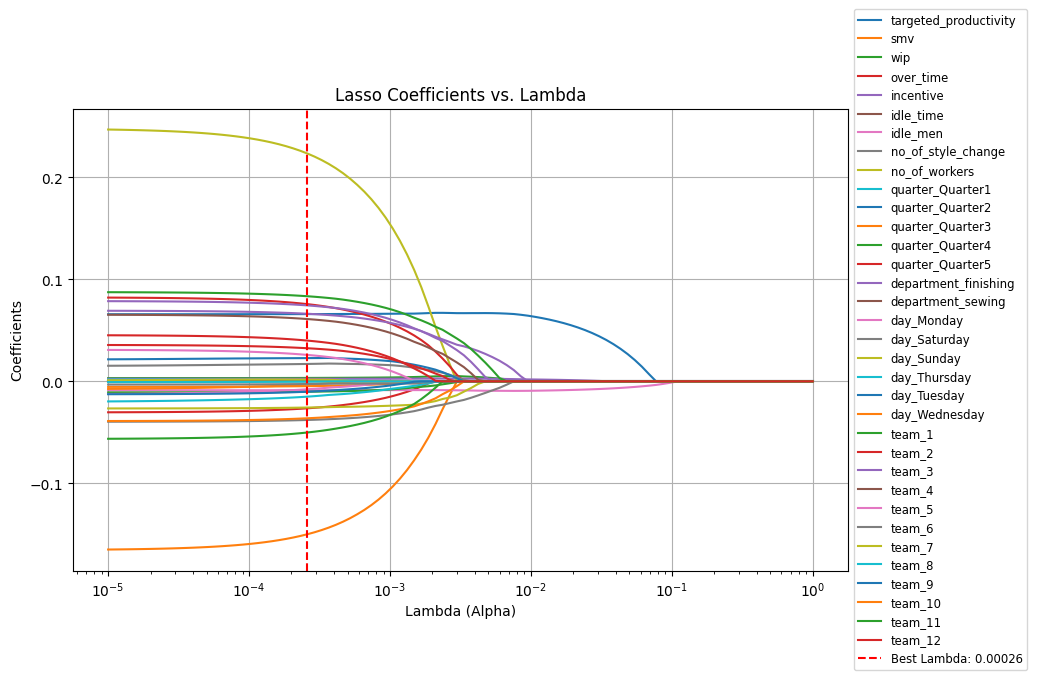

In [ ]:
coefs = []
for alpha in lambdas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

# Transpose coefficients to have each row represent a feature
coefs = np.array(coefs).T

plt.figure(figsize=(10, 6))
for coef, name in zip(coefs, feature_names):
    plt.plot(lambdas, coef, label=name)

plt.xscale('log')
plt.xlabel("Lambda (Alpha)")
plt.ylabel("Coefficients")
plt.title("Lasso Coefficients vs. Lambda")
plt.grid(True)
plt.axvline(x=best_lambda, color='r', linestyle='--', label=f'Best Lambda: {best_lambda:.5f}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.show()